In [84]:
import pandas as pd
from scipy.signal import find_peaks

In [10]:
with open('WALKING.csv', 'r') as file:
    lines = file.readlines()

with open('WALKING.csv', 'w') as file:
    for line in lines:
        # Strip the newline character and then check for the comma
        if line.endswith(',\n'):
            # Remove the last comma and add the newline character back
            line = line[:-2] + '\n'
        elif line.endswith(','):
            # If the line doesn't end with a newline (e.g., the last line), just remove the comma
            line = line[:-1]
        file.write(line)

In [34]:
df = pd.read_csv("WALKING.csv")

In [35]:
df

,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z
0,8053921773725,-0.883179,1.508240,9.011398,-0.402206,0.077042,-0.192047,0.000000,0.000000,0.000000
1,8053926809125,-0.859634,1.496918,9.453842,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,8053931844525,-0.838913,1.510834,9.847977,-0.391907,-0.110809,-0.127625,0.000000,0.000000,0.000000
3,8053936879926,-0.772034,1.532089,10.237396,-0.349976,-0.206604,-0.099014,0.000000,0.000000,0.000000
4,8053941915326,-0.683975,1.533402,10.469177,-0.285629,-0.302750,-0.073761,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
4403,8076092618803,-0.668900,1.024261,10.868851,-0.003342,0.089264,-0.067215,17.338562,-18.896484,-47.998047
4404,8076097654203,-0.771667,0.975876,10.488922,0.029312,0.091171,-0.065018,17.338562,-18.896484,-47.998047
4405,8076102689603,-0.599350,0.979950,10.136169,0.051102,0.099884,-0.061279,17.338562,-18.896484,-47.998047
4406,8076107725004,-0.295120,0.931442,9.666077,0.056076,0.111725,-0.053421,17.512512,-18.435669,-47.749330


<AxesSubplot: title={'center': 'All timeseries'}>

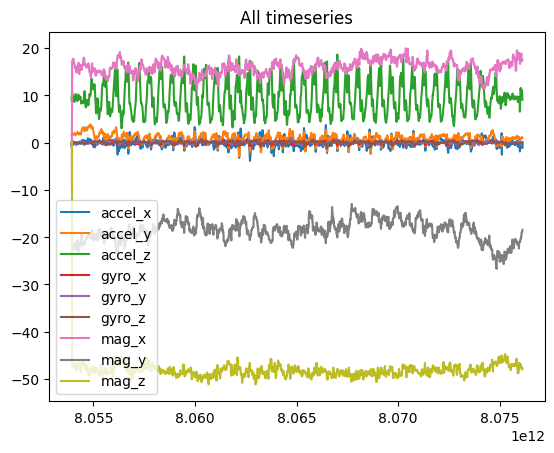

In [37]:
dfplot = pd.DataFrame({'accel_x': list(df['accel_x']),
                       'accel_y': list(df['accel_y']),
                       'accel_z': list(df['accel_z']),
                       'gyro_x': list(df['gyro_x']),
                       'gyro_y': list(df['gyro_y']),
                       'gyro_z': list(df['gyro_z']),
                       'mag_x': list(df['mag_x']),
                       'mag_y': list(df['mag_y']),
                       'mag_z': list(df['mag_z']),
                      },
                  index=list(df['timestamp']))
dfplot.plot(title = "All timeseries")

We can see that accel_z is the best representation in step detection, so I'm going to use this column.

<AxesSubplot: title={'center': 'Raw accel_z'}>

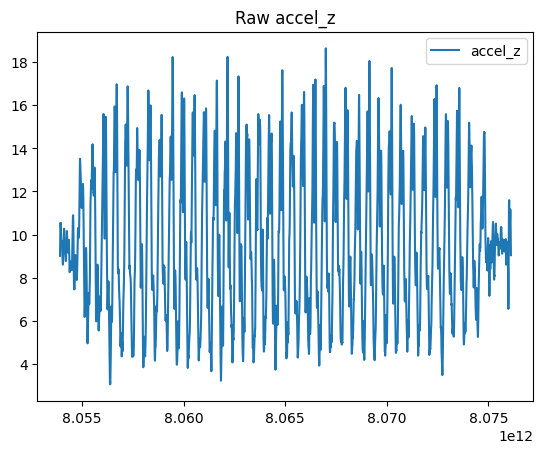

In [52]:
df_selected = pd.DataFrame({'accel_z': list(df['accel_z'])},
                  index=list(df['timestamp']))
df_selected.plot(title = "Raw accel_z")

<AxesSubplot: title={'center': 'Raw vs Smoothed accel_z'}>

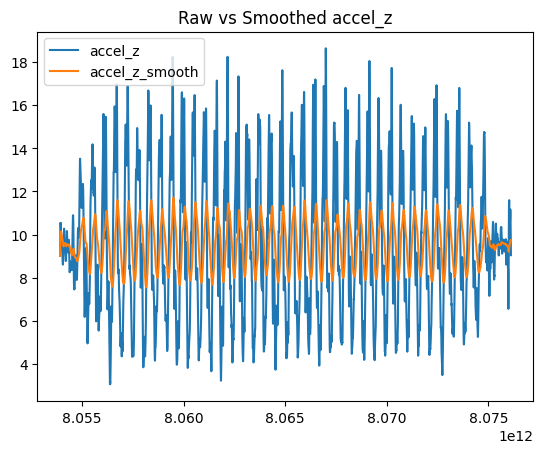

In [83]:
df_compare = pd.DataFrame({'accel_z': list(df['accel_z']),
                           'accel_z_smooth': list(df['accel_z'].ewm(span=100).mean())},
                  index=list(df['timestamp']))
df_compare.plot(title = "Raw vs Smoothed accel_z")

In [79]:
df_compare['accel_z_smooth']

8053921773725    9.011398
8053926809125    9.237044
8053931844525    9.448888
8053936879926    9.657997
8053941915326    9.833466
                   ...   
8076092618803    9.964587
8076097654203    9.985149
8076102689603    9.991072
8076107725004    9.978327
8076112760404    9.941714
Name: accel_z_smooth, Length: 4408, dtype: float64

In [89]:
peaks, _ = find_peaks(df_compare['accel_z_smooth'], height=10.5)
number_of_steps = len(peaks)
print("Number of steps detected:", number_of_steps)

Number of steps detected: 37
